In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import itertools

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans
import jax.random as random
from jax import vmap

In [3]:
from resource_environment import Bandit_Resource_Environment

In [4]:
env = Bandit_Resource_Environment(random_state=1234,num_users=1000,bin_values=[1.0,2.0,5.0])

In [5]:
X = env.user_prefs

In [6]:
n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
# ipca = PCA(n_components=n_components)
X_ipca = ipca.fit_transform(X)

In [7]:
y_pred = KMeans(n_clusters=3, random_state=170).fit_predict(X_ipca)

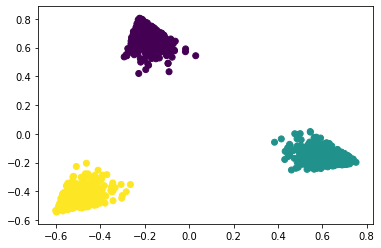

In [8]:
plt.scatter(X_ipca[:, 0], X_ipca[:, 1], c=y_pred)
plt.show()

In [9]:
cntxts = env.user_context

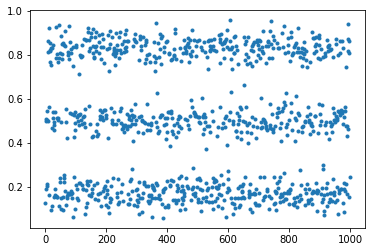

In [10]:
plt.plot(cntxts,'.')
plt.show()

In [11]:
user_idx, user_cntxt = env.sample_new_user()
user_idx, user_cntxt

(786, 0.5723653362192249)

In [12]:
batch = env.initialize_batch_of_data(num_iters=500,num_pulls_per_user=8)

In [13]:
env.resources_avail

array([0., 0., 0.])

In [14]:
env.init_bins

array([356., 345., 299.])

In [ ]:
env.fit_bnn_predictor(initial_run=True)

warmup:   4%|▍         | 88/2250 [09:27<4:31:24,  7.53s/it, 1023 steps of size 1.07e-09. acc. prob=0.70]

In [ ]:
env.restock(fill_type=0.45)

In [ ]:
usr_idx, usr_cntxt = env.sample_new_user()

In [ ]:
env.resources_avail

In [ ]:
X_test = np.insert(np.copy(env.resources_avail),0,usr_cntxt)[np.newaxis,:]
# X_test = np.insert(np.copy([0.,0.,0.]),0,usr_cntxt)[np.newaxis,:]

In [ ]:
X_test

In [ ]:
vmap_args = (env.bnn_samples, random.split(env.rng_key_predict, env.bnn_num_samples * env.bnn_num_chains))
prediction = vmap(lambda samples,rng_key: env.bnn_predict(rng_key,samples,X_test))(*vmap_args)

In [ ]:
pred = np.mean(prediction,axis=0)

In [ ]:
pred

In [ ]:
env.user_prefs[usr_idx]